In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Analyse House Price Data

In [293]:
def f1(x):
#    print(x)
    if x=='.':
        x=float('nan')
    else:
        x = np.float(x)
    return x
def f2(x):
    return str(x)
converter = {'Year':f2,'price per  square meter':f1}
housing_prices = pd.read_csv('housing_prices2.csv', encoding='utf-8', sep=';',converters=converter)

In [296]:
housing_prices.head()

Year           County          Housing type  price per  square meter  \
0  2008   005 - Alajärvi        Block of Flats                   1458.0   
1  2008   005 - Alajärvi  single-family houses                    954.0   
2  2008  009 - Alavieska        Block of Flats                      NaN   
3  2008  009 - Alavieska  single-family houses                    804.0   
4  2008     010 - Alavus        Block of Flats                   1024.0   

  # of observations  
0                 9  
1                31  
2                 .  
3                 6  
4                13

In [297]:
housing_prices = housing_prices.rename(index=str, columns={"price per  square meter": "price/sqm"})

In [298]:
housing_prices.columns

Index(['Year', 'County', 'Housing type', 'price/sqm', '# of observations'], dtype='object')

In [299]:
s = housing_prices['County'].apply(lambda x: x.split('-'))
housing_prices['County_ID'] = s.apply(lambda x: x[0].strip())
housing_prices['County2'] = s.apply(lambda x: x[1].strip())

In [300]:
housing_prices.head()

Year           County          Housing type  price/sqm # of observations  \
0  2008   005 - Alajärvi        Block of Flats     1458.0                 9   
1  2008   005 - Alajärvi  single-family houses      954.0                31   
2  2008  009 - Alavieska        Block of Flats        NaN                 .   
3  2008  009 - Alavieska  single-family houses      804.0                 6   
4  2008     010 - Alavus        Block of Flats     1024.0                13   

  County_ID    County2  
0       005   Alajärvi  
1       005   Alajärvi  
2       009  Alavieska  
3       009  Alavieska  
4       010     Alavus

In [303]:
print(len(set(housing_prices['County2'])))
print(len(set(housing_prices['Year'])))

333
9


In [91]:
housing_prices_block_flats = housing_prices[housing_prices['Housing type'] == 'Block of Flats']
housing_prices_single_family_houses = housing_prices[housing_prices['Housing type'] == 'single-family houses']

In [92]:
np.array(housing_prices_block_flats[housing_prices_block_flats["County2"] == 'Espoo']['price/sqm'])

array([ 2571.,  2635.,  2928.,  3002.,  3178.,  3185.,  3240.,  3226.,
        3382.])

In [93]:
housing_prices_single_family_houses.head()

Year           County          Housing type  price/sqm # of observations  \
1  2008   005 - Alajärvi  single-family houses      954.0                31   
3  2008  009 - Alavieska  single-family houses      804.0                 6   
5  2008     010 - Alavus  single-family houses     1075.0                22   
7  2008   015 - Artjärvi  single-family houses        NaN                 4   
9  2008   016 - Asikkala  single-family houses     1280.0                41   

  County_ID    County2  
1       005   Alajärvi  
3       009  Alavieska  
5       010     Alavus  
7       015   Artjärvi  
9       016   Asikkala

/Users/gaurav.khullar/anaconda/envs/python3.6/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


Text(0.5,1,'KERAVA')

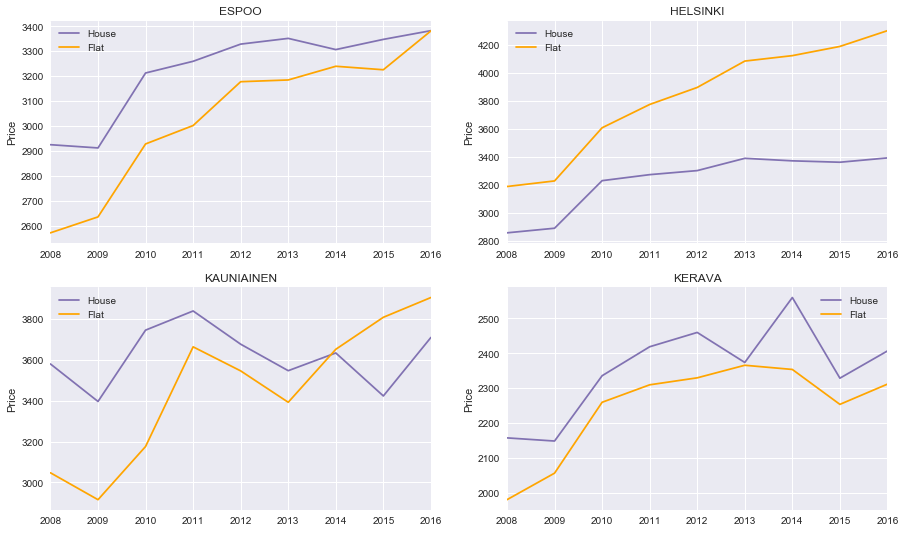

In [324]:
import seaborn as sns
sns.set(color_codes=True)
c = np.arange(2008,2017)
c = list(c.astype('str'))
x = np.array(c)

gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 1])
fig = plt.figure(figsize=(15, 9))
ax0 = fig.add_subplot(gs[0, 0])
#plt.subplots(figsize=(7, 5))
y_vals_flat = np.array(housing_prices_block_flats[housing_prices_block_flats["County2"] == 'Espoo']['price/sqm'])
y_vals_house = np.array(housing_prices_single_family_houses[housing_prices_single_family_houses["County2"] == 'Espoo']['price/sqm'])
espoo = sns.tsplot(data=y_vals_house,time=x,value='Price',color='m',legend=True,condition='House')
espoo = sns.tsplot(data=y_vals_flat,time=x,value='Price',color='orange',legend=True,condition='Flat')
espoo.set_title("ESPOO")

ax1 = fig.add_subplot(gs[0, 1])
#plt.subplots(figsize=(7, 5))
y_vals_flat = np.array(housing_prices_block_flats[housing_prices_block_flats["County2"] == 'Helsinki']['price/sqm'])
y_vals_house = np.array(housing_prices_single_family_houses[housing_prices_single_family_houses["County2"] == 'Helsinki']['price/sqm'])
helsinki = sns.tsplot(data=y_vals_house,time=x,value='Price',color='m',legend=True,condition='House')
helsinki = sns.tsplot(data=y_vals_flat,time=x,value='Price',color='orange',legend=True,condition='Flat')
helsinki.set_title("HELSINKI")

ax2 = fig.add_subplot(gs[1, 0])
#plt.subplots(figsize=(7, 5))
y_vals_flat = np.array(housing_prices_block_flats[housing_prices_block_flats["County2"] == 'Kauniainen']['price/sqm'])
y_vals_house = np.array(housing_prices_single_family_houses[housing_prices_single_family_houses["County2"] == 'Kauniainen']['price/sqm'])
kauniainen = sns.tsplot(data=y_vals_house,time=x,value='Price',color='m',legend=True,condition='House')
kauniainen = sns.tsplot(data=y_vals_flat,time=x,value='Price',color='orange',legend=True,condition='Flat')
kauniainen.set_title("KAUNIAINEN")

ax3 = fig.add_subplot(gs[1, 1])
#plt.subplots(figsize=(7, 5))
y_vals_flat = np.array(housing_prices_block_flats[housing_prices_block_flats["County2"] == 'Kerava']['price/sqm'])
y_vals_house = np.array(housing_prices_single_family_houses[housing_prices_single_family_houses["County2"] == 'Kerava']['price/sqm'])
kerava = sns.tsplot(data=y_vals_house,time=x,value='Price',color='m',legend=True,condition='House')
kerava = sns.tsplot(data=y_vals_flat,time=x,value='Price',color='orange',legend=True,condition='Flat')
kerava.set_title('KERAVA')

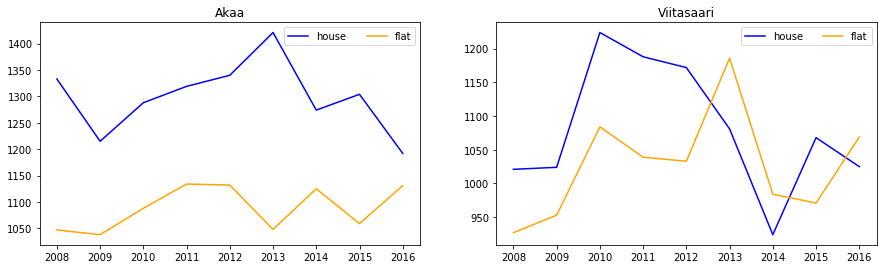

In [96]:
x_vals = np.array(c)
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 1])
fig = plt.figure(figsize=(15, 9))
ax0 = fig.add_subplot(gs[0, 0])
#plt.subplots(figsize=(7, 5))

y_vals_flat = np.array(housing_prices_block_flats[housing_prices_block_flats["County2"] == 'Akaa']['price/sqm'])
y_vals_house = np.array(housing_prices_single_family_houses[housing_prices_single_family_houses["County2"] == 'Akaa']['price/sqm'])

ax0.plot(x_vals,y_vals_house,color='blue',label='house')
ax0.plot(x_vals,y_vals_flat,color='orange',label='flat')
ax0.set_title('Akaa')
leg = plt.legend(loc='best', ncol=2)

ax1 = fig.add_subplot(gs[0, 1])
#plt.subplots(figsize=(7, 5))
y_vals_flat = np.array(housing_prices_block_flats[housing_prices_block_flats["County2"] == 'Viitasaari']['price/sqm'])
y_vals_house = np.array(housing_prices_single_family_houses[housing_prices_single_family_houses["County2"] == 'Viitasaari']['price/sqm'])

ax1.plot(x_vals,y_vals_house,color='blue',label='house')
ax1.plot(x_vals,y_vals_flat,color='orange',label='flat')
ax1.set_title('Viitasaari')
leg = plt.legend(loc='best', ncol=2)

# Analyse 1.1.2017 Population Density Data

In [328]:
def f(x):
#    print(x)
    x = x.replace(",",".")
    c = x.count('.')
    if c>1:
#        print(x)
#        print('--')
        x = "".join(x.rsplit('.',1))
#        print(x)
        #x = x.replace_right(".","",1)
#    print(np.float(x))
    return np.float(x)
def f1(x):
    return str(x)
converter = {'Year':f1,'Population density / km_':f,'Area km_ 1.1.2017':f}
pop_density = pd.read_csv('population_density2.csv', encoding='utf-8', sep=';',converters=converter)
#pop_density = pd.read_csv('population_density2.csv', encoding='utf-8', sep=';')

In [329]:
pop_density.head(10)

Year         County  Area km_ 1.1.2017  Population 1.1.2017  \
0  2016       KOKO MAA          303912.28              5503297   
1  2016   005 Alajärvi            1008.79                 9899   
2  2016  009 Alavieska             251.41                 2639   
3  2016     010 Alavus            1087.23                11907   
4  2016   016 Asikkala             563.28                 8323   
5  2016     018 Askola             212.42                 5046   
6  2016       019 Aura              95.00                 3984   
7  2016       020 Akaa             293.15                16923   
8  2016     035 Brändö             108.14                  471   
9  2016     043 Eckerö             107.72                  928   

   Population density / km_  
0                 18.110000  
1                  0.431250  
2                 10.500000  
3                  0.482639  
4                  0.637500  
5                  1.010417  
6                 41.940000  
7                 57.730000  
8                  4.360000  
9                  0.375694

In [330]:
pop_density.at[0,'County'] = 'WHOLE COUNTRY'

In [331]:
s = pop_density['County'].apply(lambda x: x.split(' '))
pop_density['County_ID'] = s.apply(lambda x: x[0].strip())
pop_density['County2'] = s.apply(lambda x: x[1].strip())

pop_density.at[0,'County2'] = 'WHOLE COUNTRY'

In [332]:
pop_density.head()

Year         County  Area km_ 1.1.2017  Population 1.1.2017  \
0  2016  WHOLE COUNTRY          303912.28              5503297   
1  2016   005 Alajärvi            1008.79                 9899   
2  2016  009 Alavieska             251.41                 2639   
3  2016     010 Alavus            1087.23                11907   
4  2016   016 Asikkala             563.28                 8323   

   Population density / km_ County_ID        County2  
0                 18.110000     WHOLE  WHOLE COUNTRY  
1                  0.431250       005       Alajärvi  
2                 10.500000       009      Alavieska  
3                  0.482639       010         Alavus  
4                  0.637500       016       Asikkala

In [333]:
print(pop_density['Population density / km_'].min())
print(pop_density['Population density / km_'].max())

0.044444444
2965.23


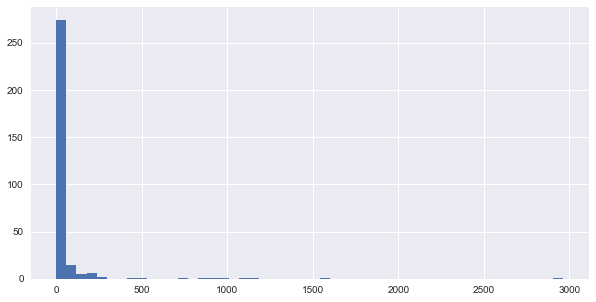

In [336]:
plt.subplots(figsize=(10, 5))
#v_a = sorted(df_a_customer_life['Revenue'].values)
n, bins, patches = plt.hist(sorted(pop_density['Population density / km_'].values),bins=50)
#plt.plot(pop_density['Population density / km_'])

In [147]:
pop_density[pop_density['Population density / km_']>700]

Year             County  Area km_ 1.1.2017  Population 1.1.2017  \
12   2016          049 Espoo         312.290000               274583   
33   2016       091 Helsinki         214.210000               635181   
34   2016         092 Vantaa         238.370000               219341   
68   2016      186 Järvenpää          37.540000                41529   
85   2016     235 Kauniainen           0.270139                 9397   
91   2016         245 Kerava          30.630000                35511   
155  2016  478 Maarianhamina           0.513889                11565   
278  2016          853 Turku         245.670000               187604   

     Population density / km_ County_ID        County2  
12                     879.26       049          Espoo  
33                    2965.23       091       Helsinki  
34                     920.17       092         Vantaa  
68                    1106.26       186      Järvenpää  
85                    1595.42       235     Kauniainen  
91                    1159.35       245         Kerava  
155                    980.08       478  Maarianhamina  
278                    763.64       853          Turku

In [337]:
pop_density.shape

(312, 7)

In [341]:
temp_pop = pd.merge(housing_prices,pop_density[['Year','Population density / km_','County2']],how='left',on=['County2','Year'])

In [344]:
temp_pop = temp_pop[temp_pop['Year'] == '2016']

In [346]:
temp_pop.head()

Year           County          Housing type  price/sqm  \
5344  2016   005 - Alajärvi        Block of Flats     1178.0   
5345  2016   005 - Alajärvi  single-family houses      981.0   
5346  2016  009 - Alavieska        Block of Flats        NaN   
5347  2016  009 - Alavieska  single-family houses      684.0   
5348  2016     010 - Alavus        Block of Flats     1025.0   

     # of observations County_ID    County2  Population density / km_  
5344                 8       005   Alajärvi                  0.431250  
5345                19       005   Alajärvi                  0.431250  
5346                 .       009  Alavieska                 10.500000  
5347                 7       009  Alavieska                 10.500000  
5348                 9       010     Alavus                  0.482639

In [348]:
temp_pop.dropna(axis=0,how='any',inplace=True)

Text(0,0.5,'Price/sqm')

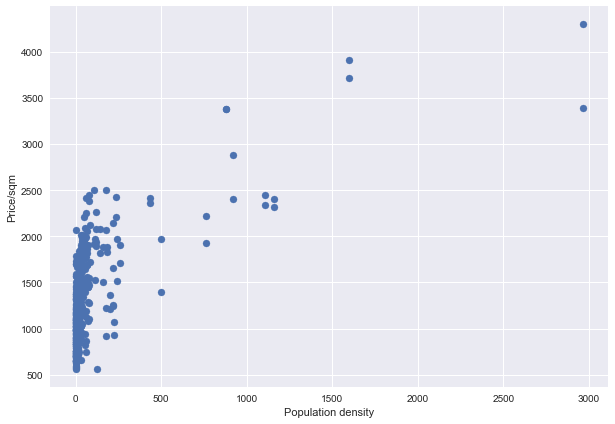

In [350]:
plt.subplots(figsize=(10, 7))
plt.scatter(temp_pop['Population density / km_'],temp_pop['price/sqm'])
plt.xlabel('Population density')
plt.ylabel('Price/sqm')

# Use Population Data to calculate Population Density

In [148]:
def f(x):
    x = x.replace(",","")
    return np.float(x)
converter = {'2008':f,'2009':f, '2010':f,'2011':f,'2012':f,'2013':f,'2014':f,'2015':f}

population = pd.read_csv('population2.csv', encoding='utf-8', sep='\t',converters=converter)
population = population.rename(index=str, columns={" ": "County"})
population['County2'] = population['County']

population.head()

County       2008       2009       2010       2011       2012  \
0  WHOLE COUNTRY  5326314.0  5351427.0  5375276.0  5401267.0  5426674.0   
1           Akaa    16837.0    16858.0    17012.0    17091.0    17134.0   
2       Alajärvi    10634.0    10573.0    10487.0    10327.0    10268.0   
3      Alavieska     2759.0     2776.0     2770.0     2750.0     2761.0   
4         Alavus    12706.0    12586.0    12439.0    12385.0    12341.0   

        2013       2014       2015        County2  
0  5451270.0  5471753.0  5487308.0  WHOLE COUNTRY  
1    17108.0    17052.0    17043.0           Akaa  
2    10227.0    10171.0    10006.0       Alajärvi  
3     2740.0     2687.0     2687.0      Alavieska  
4    12228.0    12103.0    12044.0         Alavus

In [149]:
c = np.arange(2008,2016)
c = list(c.astype('str'))
new_pop = pd.melt(population, id_vars='County2', value_vars=c)
new_pop.columns = ['County2','Year','Population']

In [150]:
new_pop.head()

County2  Year  Population
0  WHOLE COUNTRY  2008   5326314.0
1           Akaa  2008     16837.0
2       Alajärvi  2008     10634.0
3      Alavieska  2008      2759.0
4         Alavus  2008     12706.0

In [151]:
new_pop = pd.merge(new_pop,pop_density[['Area km_ 1.1.2017','County2']],how='left',on=['County2'])
new_pop.dropna(axis=0,how='any',inplace=True)
new_pop.head()

County2  Year  Population  Area km_ 1.1.2017
0  WHOLE COUNTRY  2008   5326314.0          303912.28
1           Akaa  2008     16837.0             293.15
2       Alajärvi  2008     10634.0            1008.79
3      Alavieska  2008      2759.0             251.41
4         Alavus  2008     12706.0            1087.23

In [152]:
new_pop['Pop_Density'] = new_pop['Population']/new_pop['Area km_ 1.1.2017']
new_pop.head()

County2  Year  Population  Area km_ 1.1.2017  Pop_Density
0  WHOLE COUNTRY  2008   5326314.0          303912.28    17.525827
1           Akaa  2008     16837.0             293.15    57.434760
2       Alajärvi  2008     10634.0            1008.79    10.541342
3      Alavieska  2008      2759.0             251.41    10.974106
4         Alavus  2008     12706.0            1087.23    11.686580

In [133]:
#new_pop['Year'] = new_pop['Year'].astype('str')

In [153]:
new_pop.index = new_pop[['County2','Year']]
new_pop.head()
new_pop.index 

Index([('WHOLE COUNTRY', '2008'),          ('Akaa', '2008'),
            ('Alajärvi', '2008'),     ('Alavieska', '2008'),
              ('Alavus', '2008'),      ('Asikkala', '2008'),
              ('Askola', '2008'),          ('Aura', '2008'),
              ('Brändö', '2008'),        ('Eckerö', '2008'),
       ...
           ('Virolahti', '2015'),        ('Virrat', '2015'),
               ('Vårdö', '2015'),         ('Vöyri', '2015'),
           ('Ylitornio', '2015'),     ('Ylivieska', '2015'),
            ('Ylöjärvi', '2015'),         ('Ypäjä', '2015'),
              ('Ähtäri', '2015'),     ('Äänekoski', '2015')],
      dtype='object', length=2384)

In [154]:
pop_density.index = pop_density[['County2','Year']]
pop_density = pop_density.rename(columns={"Population 1.1.2017": "Population", "Population density / km_": "Pop_Density"})
pop_density = pop_density[new_pop.columns]
pop_density.head()
#population['Density_2016'] = pd.merge(population,pop_density[['Population density / km_','County2']],how='left',on=['County2'])['Population density / km_']

County2  Year  Population  Area km_ 1.1.2017  \
(WHOLE COUNTRY, 2016)  WHOLE COUNTRY  2016     5503297          303912.28   
(Alajärvi, 2016)            Alajärvi  2016        9899            1008.79   
(Alavieska, 2016)          Alavieska  2016        2639             251.41   
(Alavus, 2016)                Alavus  2016       11907            1087.23   
(Asikkala, 2016)            Asikkala  2016        8323             563.28   

                       Pop_Density  
(WHOLE COUNTRY, 2016)    18.110000  
(Alajärvi, 2016)          0.431250  
(Alavieska, 2016)        10.500000  
(Alavus, 2016)            0.482639  
(Asikkala, 2016)          0.637500

In [170]:
#result = new_pop.join(pop_density, how='outer',lsuffix='_l', rsuffix='_r')
new_pop = new_pop.append(pop_density)
#result = pd.merge(new_pop, pop_density, left_index=True, right_index=True, how='outer')

In [171]:
new_pop.head()

County2  Year  Population  Area km_ 1.1.2017  \
(WHOLE COUNTRY, 2008)  WHOLE COUNTRY  2008   5326314.0          303912.28   
(Akaa, 2008)                    Akaa  2008     16837.0             293.15   
(Alajärvi, 2008)            Alajärvi  2008     10634.0            1008.79   
(Alavieska, 2008)          Alavieska  2008      2759.0             251.41   
(Alavus, 2008)                Alavus  2008     12706.0            1087.23   

                       Pop_Density  
(WHOLE COUNTRY, 2008)    17.525827  
(Akaa, 2008)             57.434760  
(Alajärvi, 2008)         10.541342  
(Alavieska, 2008)        10.974106  
(Alavus, 2008)           11.686580

In [172]:
new_pop.tail()

County2  Year  Population  Area km_ 1.1.2017  Pop_Density
(Ylivieska, 2016)  Ylivieska  2016     15199.0             568.66      26.7300
(Ylöjärvi, 2016)    Ylöjärvi  2016     32799.0            1115.72      29.4000
(Ypäjä, 2016)          Ypäjä  2016      2382.0             182.76      13.0300
(Ähtäri, 2016)        Ähtäri  2016      5985.0             805.85       7.4300
(Äänekoski, 2016)  Äänekoski  2016     19374.0             884.54       0.9375

# Merging Price and Population Dataframe

In [167]:
housing_prices_single_family_houses.head()

Year           County          Housing type  price/sqm  \
(Alajärvi, 2008)   2008   005 - Alajärvi  single-family houses      954.0   
(Alavieska, 2008)  2008  009 - Alavieska  single-family houses      804.0   
(Alavus, 2008)     2008     010 - Alavus  single-family houses     1075.0   
(Artjärvi, 2008)   2008   015 - Artjärvi  single-family houses        NaN   
(Asikkala, 2008)   2008   016 - Asikkala  single-family houses     1280.0   

                  # of observations County_ID    County2  
(Alajärvi, 2008)                 31       005   Alajärvi  
(Alavieska, 2008)                 6       009  Alavieska  
(Alavus, 2008)                   22       010     Alavus  
(Artjärvi, 2008)                  4       015   Artjärvi  
(Asikkala, 2008)                 41       016   Asikkala

In [174]:
housing_prices_block_flats.head()

Year           County    Housing type  price/sqm # of observations  \
0  2008   005 - Alajärvi  Block of Flats     1458.0                 9   
2  2008  009 - Alavieska  Block of Flats        NaN                 .   
4  2008     010 - Alavus  Block of Flats     1024.0                13   
6  2008   015 - Artjärvi  Block of Flats        NaN                 2   
8  2008   016 - Asikkala  Block of Flats     1291.0                33   

  County_ID    County2  
0       005   Alajärvi  
2       009  Alavieska  
4       010     Alavus  
6       015   Artjärvi  
8       016   Asikkala

In [175]:
housing_prices_single_family_houses.index = housing_prices_single_family_houses[['County2','Year']]
housing_prices_block_flats.index = housing_prices_block_flats[['County2','Year']]

In [176]:
housing_prices_block_flats.index

Index([  ('Alajärvi', '2008'),  ('Alavieska', '2008'),     ('Alavus', '2008'),
         ('Artjärvi', '2008'),   ('Asikkala', '2008'),     ('Askola', '2008'),
             ('Aura', '2008'),       ('Akaa', '2008'),  ('Enonkoski', '2008'),
        ('Enontekiö', '2008'),
       ...
        ('Äänekoski', '2016'),     ('Halsua', '2016'), ('Kuhmalahti', '2016'),
       ('Lappajärvi', '2016'),   ('Lumijoki', '2016'),    ('Utsjoki', '2016'),
            ('Vöyri', '2016'),   ('Hailuoto', '2016'),   ('Parainen', '2016'),
       ('Lestijärvi', '2016')],
      dtype='object', length=3006)

In [178]:
merged_df_houses = new_pop.join(housing_prices_single_family_houses['price/sqm'])
merged_df_flats = new_pop.join(housing_prices_block_flats['price/sqm'])
merged_df_flats.head(10)

County2  Year  Population  Area km_ 1.1.2017  Pop_Density  \
(Akaa, 2008)          Akaa  2008     16837.0             293.15    57.434760   
(Akaa, 2009)          Akaa  2009     16858.0             293.15    57.506396   
(Akaa, 2010)          Akaa  2010     17012.0             293.15    58.031724   
(Akaa, 2011)          Akaa  2011     17091.0             293.15    58.301211   
(Akaa, 2012)          Akaa  2012     17134.0             293.15    58.447894   
(Akaa, 2013)          Akaa  2013     17108.0             293.15    58.359202   
(Akaa, 2014)          Akaa  2014     17052.0             293.15    58.168173   
(Akaa, 2015)          Akaa  2015     17043.0             293.15    58.137472   
(Akaa, 2016)          Akaa  2016     16923.0             293.15    57.730000   
(Alajärvi, 2008)  Alajärvi  2008     10634.0            1008.79    10.541342   

                  price/sqm  
(Akaa, 2008)         1047.0  
(Akaa, 2009)         1038.0  
(Akaa, 2010)         1088.0  
(Akaa, 2011)         1134.0  
(Akaa, 2012)         1132.0  
(Akaa, 2013)         1048.0  
(Akaa, 2014)         1125.0  
(Akaa, 2015)         1059.0  
(Akaa, 2016)         1131.0  
(Alajärvi, 2008)     1458.0

In [228]:
merged_df_flats[merged_df_flats['County2']=='Alajärvi']

County2  Year  Population  Area km_ 1.1.2017  Pop_Density  \
(Alajärvi, 2008)  Alajärvi  2008     10634.0            1008.79    10.541342   
(Alajärvi, 2009)  Alajärvi  2009     10573.0            1008.79    10.480873   
(Alajärvi, 2010)  Alajärvi  2010     10487.0            1008.79    10.395622   
(Alajärvi, 2011)  Alajärvi  2011     10327.0            1008.79    10.237017   
(Alajärvi, 2012)  Alajärvi  2012     10268.0            1008.79    10.178531   
(Alajärvi, 2013)  Alajärvi  2013     10227.0            1008.79    10.137888   
(Alajärvi, 2014)  Alajärvi  2014     10171.0            1008.79    10.082376   
(Alajärvi, 2015)  Alajärvi  2015     10006.0            1008.79     9.918814   
(Alajärvi, 2016)  Alajärvi  2016      9899.0            1008.79     0.431250   

                  price/sqm  Pop_density_1  
(Alajärvi, 2008)     1458.0      57.730000  
(Alajärvi, 2009)     1300.0      10.541342  
(Alajärvi, 2010)        NaN      10.480873  
(Alajärvi, 2011)        NaN      10.395622  
(Alajärvi, 2012)     1466.0      10.237017  
(Alajärvi, 2013)     1152.0      10.178531  
(Alajärvi, 2014)        NaN      10.137888  
(Alajärvi, 2015)        NaN      10.082376  
(Alajärvi, 2016)     1178.0       9.918814

In [357]:
#Is there any correlation between Price and Pop_density
cor_flats = merged_df_flats['price/sqm'].corr(merged_df_flats['Pop_density_1'])
print(cor_flats)

cor_houses = merged_df_houses['price/sqm'].corr(merged_df_houses['Pop_Density'])
print(cor_houses)

0.378673438865
0.346465051192


# Model Development

**Model for every city seperately for flats and houses**

In [283]:
"""
Creating a model for every city seperately.
"""

def create_model(df):
    results = pd.DataFrame()
    for group in df.groupby('County2'):

        new_df = group[1]
        new_df.dropna(axis=0,how='any',inplace=True)

        new_df['Pop_density_1'] = new_df['Pop_Density'].shift(1)

        new_df['price/sqm_1Ahead'] = new_df['price/sqm'].shift(-1)
        new_df.dropna(axis=0,how='any',inplace=True)


        X = np.array(new_df[['Pop_Density','Pop_density_1']])
        Y = np.array(new_df[['price/sqm_1Ahead']])

        if len(X)>2:
            reg = LinearRegression()
            x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=2)
            reg.fit(x_train,y_train)
            y_pred = reg.predict(x_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
    #        print("Mean squared error: %.2f"% mse)
            # Explained variance score: 1 is perfect prediction
    #        print('Variance score: %.2f' % r2)
            results = results.append([[group[0],mse,r2]])

    return results
        

results_flats = create_model(merged_df_flats)
results_houses = create_model(merged_df_houses)

/Users/gaurav.khullar/anaconda/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/gaurav.khullar/anaconda/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/gaurav.khullar/anaconda/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [286]:
good_results_flats = len(results_flats[results_flats[2]>0.5])
print(good_results_flats)
percent_flats = 100*good_results_flats/results_flats.shape[0]
print(percent_flats)

good_results_houses = len(results_houses[results_houses[2]>0.5])
print(good_results_houses)
percent_houses = 100*good_results_houses/results_houses.shape[0]
print(percent_houses)


9
5.625
13
5.803571428571429


** For Flats: Number of cities where R2 is above 0.5 is only 9 out of 160 = 5.6% ** <br>
** For Houses: Number of cities where R2 is above 0.5 is only 13 out of 224 = 5.8% **

**Creating a model for entire country**

In [288]:
"""
Creating a model for entire country
"""
results = pd.DataFrame()
def create_data_country(df):
    i = 0
    for group in df.groupby('County2'):
    #    print(group[0])
        new_df = group[1]
        new_df.dropna(axis=0,how='any',inplace=True)

        new_df['Pop_density_1'] = new_df['Pop_Density'].shift(1)

        new_df['price/sqm_1Ahead'] = new_df['price/sqm'].shift(-1)
        new_df.dropna(axis=0,how='any',inplace=True)
        if i == 0:
            X = np.array(new_df[['Pop_Density','Pop_density_1']])
            Y = np.array(new_df[['price/sqm_1Ahead']])
        else:
            X = np.append(X,np.array(new_df[['Pop_Density','Pop_density_1']]),axis=0)
            Y = np.append(Y,np.array(new_df[['price/sqm_1Ahead']]),axis=0)
        
        i+=1
    return(X,Y)
        
X_flats,Y_flats = create_data_country(merged_df_flats)
X_houses,Y_houses = create_data_country(merged_df_houses)

/Users/gaurav.khullar/anaconda/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/gaurav.khullar/anaconda/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/gaurav.khullar/anaconda/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [370]:
from scipy.stats.stats import pearsonr 
print(pearsonr(X_flats[:,0].reshape(-1,1),Y_flats))
print(pearsonr(X_houses[:,0].reshape(-1,1),Y_houses))

(array([ 0.40301694]), array([  1.94352678e-43]))
(array([ 0.36046909]), array([  1.05420074e-47]))


*** For Flats: There is a 40% correlation between Density and Next Year's Price *** <br>
*** For Houses: There is a 36% correlation between Density and Next Year's Price ***

In [359]:
def create_model_country(X,Y):
    reg = LinearRegression()
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=2)
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Mean squared error: %.2f"% mse)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2)
    #results = results.append([[group[0],mse,r2]])
    
    print('Regression Coefficients: ' + str(reg.coef_ ))

    
print("Model results - Flats:")
create_model_country(X_flats,Y_flats)

print("----------")
print("Model results - Houses:")
create_model_country(X_houses,Y_houses)

Model results - Flats:
Mean squared error: 272796.71
Variance score: 0.10
Regression Coefficients: [[ 6.02435586 -6.00580556]]
----------
Model results - Houses:
Mean squared error: 206039.80
Variance score: 0.08
Regression Coefficients: [[-0.66234837  0.75131316]]


**Model R2 is lower than 0.5 **